In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy

print(scipy.__version__)

1.6.2


[ 0.91683032  1.1270414  -3.3309104  ... -0.56987675 -0.82754246
 -0.57092679]
48000
0.0008333506948061418
0.024999479166666668


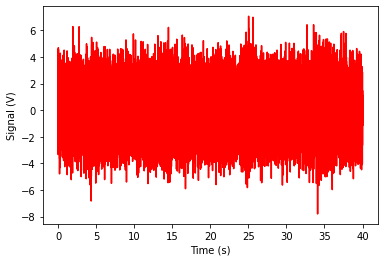

<Figure size 432x288 with 0 Axes>

In [102]:
#Plotting signal as function of time


signal = np.loadtxt('signal.mat')
print(signal)
duration = 40
N = len(signal)

print(N)
time = np.linspace(0,duration,N)
plt.plot(time, signal, color='red')
plt.xlabel("Time (s)")
plt.ylabel("Signal (V)")
plt.figure()


delta_t = time[1]-time[0]
print(delta_t)

delta_f = 1/(N*delta_t)
print(delta_f)

freq_values = np.linspace(0, (N-1)*delta_f, N)
freq_values = freq_values - (N/2)*delta_f

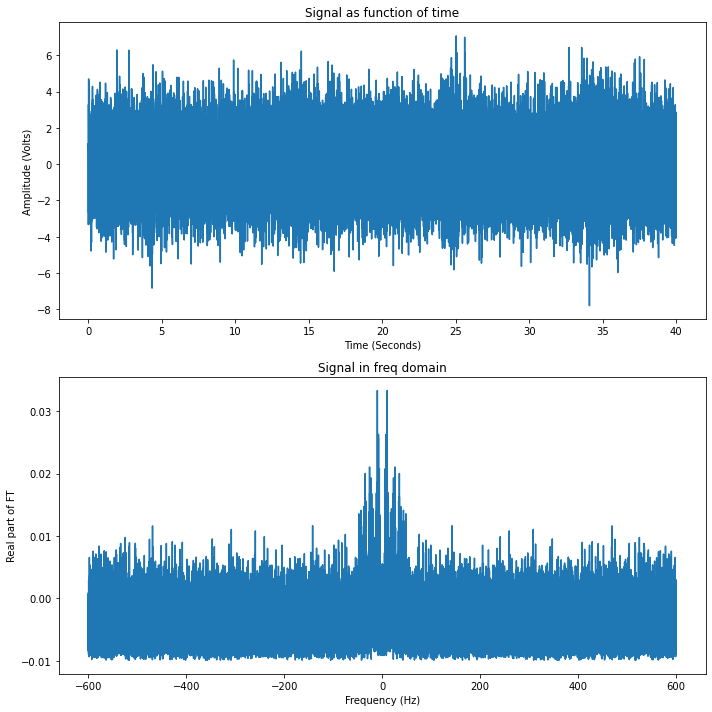

In [103]:
## fourier transform
Fourier_Transform = np.fft.fft(signal)/N
Fourier_Transform = np.fft.fftshift(Fourier_Transform)
Fourier_Transform = abs(Fourier_Transform)
Fourier_Transform = Fourier_Transform -0.01

figure, axis = plt.subplots(2,1, figsize=(10, 10))

axis[0].set_title('Signal as function of time')
axis[0].set_xlabel('Time (Seconds)')
axis[0].set_ylabel('Amplitude (Volts)')
axis[0].plot(time, signal, )

axis[1].set_title('Signal in freq domain')
axis[1].set_xlabel('Frequency (Hz)')
axis[1].set_ylabel('Real part of FT')
axis[1].plot(freq_values, Fourier_Transform.real, )
#plt.xlim([0, 70]) 
#plt.ylim([0, 0.04]) 
figure.tight_layout()

plt.show()

[-0.0009248  -0.00749146  0.00090777 ... -0.00586311 -0.00307264
 -0.00351878]
[0.00000000e+00 2.49994792e-02 4.99989583e-02 ... 5.99912502e+02
 5.99937501e+02 5.99962501e+02]


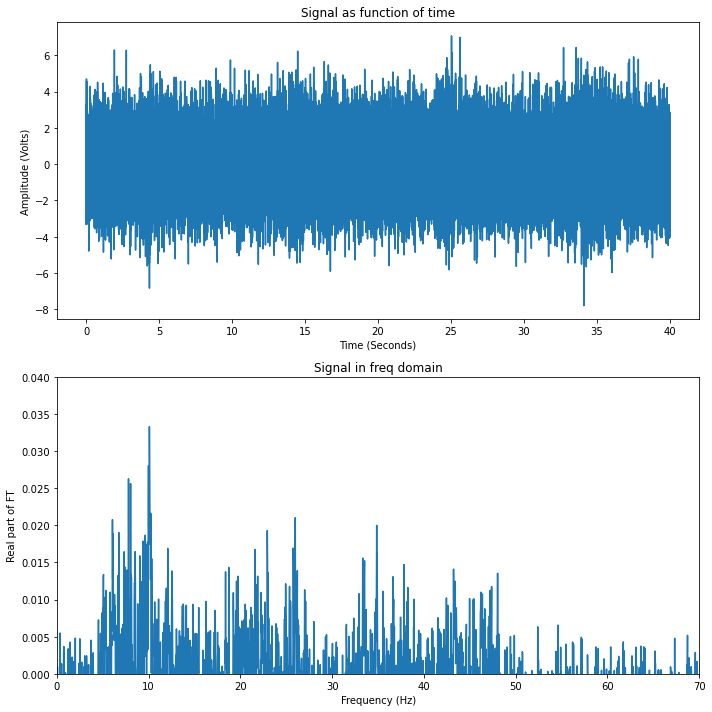

In [110]:
#Slicing the arrays so that we only consider the positive frequencies as plot is symmetric 

FT_Pos = Fourier_Transform[int(len(Fourier_Transform)/2):]
print(FT_Pos)
freq_values_Pos = freq_values[int(len(freq_values)/2):]
print(freq_values_Pos)
figure, axis = plt.subplots(2,1, figsize=(10, 10))

axis[0].set_title('Signal as function of time')
axis[0].set_xlabel('Time (Seconds)')
axis[0].set_ylabel('Amplitude (Volts)')
axis[0].plot(time, signal, )

axis[1].set_title('Signal in freq domain')
axis[1].set_xlabel('Frequency (Hz)')
axis[1].set_ylabel('Real part of FT')
axis[1].plot(freq_values_Pos, FT_Pos, )
plt.xlim([0, 70]) 
plt.ylim([0, 0.04]) 
figure.tight_layout()

plt.show()

In [122]:
#finding frequency relating to highest peak in range 0-8 Hz

ind1 = 0    #ind variable to store the index of maximum value in the list
max_element = FT_Pos[0]

#max positive frequency is 600Hz but want to check in range 0-8 so need to check,
#, arrays from index (4*len(FT_Pos)/600) to index (8*len(FT_Pos)/600) --> 160 to 320

for i in range (int(4*len(FT_Pos)/600), int(8*len(FT_Pos)/600)): #iterate over array
    if FT_Pos[i] > max_element: #to check max value
        max_element = FT_Pos[i]
        ind1 = i
#print the index of maximum element
print("The highest peak of FT in range 4-8Hz is: ",FT_Pos[ind1])
print("The associated frequency of the highest peak of FT in range 4-8Hz is: ",freq_values_Pos[ind1])

#finding frequency relating to highest peak in range 8-13 Hz

ind2 = 0    #ind variable to store the index of maximum value in the list
max_element = FT_Pos[0]

#now want to check in range 8-13Hz so need to check arrays from,
#, index (8*len(FT_Pos)/600) to index (13*len(FT_Pos)/600 ) --> 320 to 520

for i in range (int(8*len(FT_Pos)/600), int(13*len(FT_Pos)/600)): #iterate over array
    if FT_Pos[i] > max_element: #to check max value
        max_element = FT_Pos[i]
        ind2 = i
#print the index of maximum element
print("The highest peak of FT in range 8-13Hz is: ",FT_Pos[ind2])
print("The associated frequency of the highest peak of FT in range 8-13Hz is: ",freq_values_Pos[ind2])

#finding frequency relating to highest peak in range 13-30 Hz

ind3 = 0    #ind variable to store the index of maximum value in the list
max_element = FT_Pos[0]

#now want to check in range 13-30Hz so need to check arrays from,
#, index (13*len(FT_Pos)/600 ) to index (30*len(FT_Pos)/600) --> 520 to 1200

for i in range (int(13*len(FT_Pos)/600), int(30*len(FT_Pos)/600)): #iterate over array
    if FT_Pos[i] > max_element: #to check max value
        max_element = FT_Pos[i]
        ind3 = i
#print the index of maximum element
print("The highest peak of FT in range 13-30Hz is: ",FT_Pos[ind3])
print("The associated frequency of the highest peak of FT in range 13-30Hz is: ",freq_values_Pos[ind3])

#finding frequency relating to highest peak in range 30-50 Hz

ind4 = 0    #ind variable to store the index of maximum value in the list
max_element = FT_Pos[0]

#now want to check in range 30-50Hz so need to check arrays from,
#, index (30*len(FT_Pos)/600 ) to index (50*len(FT_Pos)/600) --> 1200 to 2000

for i in range (int(30*len(FT_Pos)/600), int(50*len(FT_Pos)/600)): #iterate over array
    if FT_Pos[i] > max_element: #to check max value
        max_element = FT_Pos[i]
        ind4 = i
#print the index of maximum element
print("The highest peak of FT in range 30-50Hz is: ",FT_Pos[ind4])
print("The associated frequency of the highest peak of FT in range 30-50Hz is: ",freq_values_Pos[ind4])

#These values printed correspond to the frequency for the highest peak in each of the,
#, four ranges 0-10 seconds(4-8Hz), 10-20 seconds(8-13Hz), 20-30 seconds(13-30Hz)
#, and 30-40 seconds(30-50Hz) 
#I knew to check within these ranges as in the task sheet we were given,
#, the frequency band that the dominant signal was within for each 
#, corresponding time interval



The highest peak of FT in range 4-8Hz is:  0.026273314041094557
The associated frequency of the highest peak of FT in range 4-8Hz is:  7.799837499999967
The highest peak of FT in range 8-13Hz is:  0.033302363564164224
The associated frequency of the highest peak of FT in range 8-13Hz is:  10.074790104166595
The highest peak of FT in range 13-30Hz is:  0.021038159447277778
The associated frequency of the highest peak of FT in range 13-30Hz is:  25.97445885416664
The highest peak of FT in range 30-50Hz is:  0.02000948419289726
The associated frequency of the highest peak of FT in range 30-50Hz is:  34.849273958333356


7.799837499999967


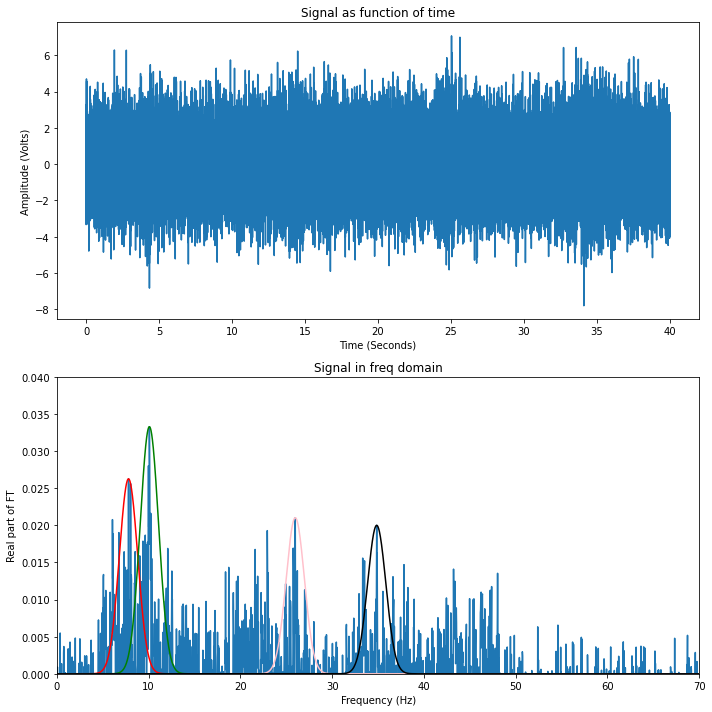

In [130]:
#Using the highest peak values to centre the four respective gaussian band pass filters on

#The gaussian band pass filter for 0-10 seconds(4-8Hz)

print(freq_values_Pos[ind1])

x = np.linspace(0,600,len(FT_Pos))
a1 = FT_Pos[ind1]
b1 = freq_values_Pos[ind1]
c1 = 1
band_pass1 = a1 * np.exp((-(x-b1)**2)/(2*c1**2))

#The gaussian band pass filter for 10-20 seconds(8-13Hz)

a2 = FT_Pos[ind2]
b2 = freq_values_Pos[ind2]
c2 = 1
band_pass2 = a2 * np.exp((-(x-b2)**2)/(2*c2**2))

#The gaussian band pass filter for 20-30 seconds(13-30Hz)

a3 = FT_Pos[ind3]
b3 = freq_values_Pos[ind3]
c3 = 1
band_pass3 = a3 * np.exp((-(x-b3)**2)/(2*c3**2))

#The gaussian band pass filter for 30-40 seconds(30-50Hz)

a4 = FT_Pos[ind4]
b4 = freq_values_Pos[ind4]
c4 = 1
band_pass4 = a4 * np.exp((-(x-b4)**2)/(2*c4**2))

figure, axis = plt.subplots(2,1, figsize=(10, 10))

axis[0].set_title('Signal as function of time')
axis[0].set_xlabel('Time (Seconds)')
axis[0].set_ylabel('Amplitude (Volts)')
axis[0].plot(time, signal, )

axis[1].set_title('Signal in freq domain')
axis[1].set_xlabel('Frequency (Hz)')
axis[1].set_ylabel('Real part of FT')
axis[1].plot(freq_values_Pos, FT_Pos )
axis[1].plot(x, band_pass1,color='red')
axis[1].plot(x, band_pass2,color='green')
axis[1].plot(x, band_pass3,color='pink')
axis[1].plot(x, band_pass4,color='black')

plt.xlim([0, 70]) 
plt.ylim([0, 0.04]) 
figure.tight_layout()

plt.show()